In [3]:
import tensorflow as tf
import input_data

In [4]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [5]:
type(mnist)

input_data._Datasets

In [6]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
mnist.train.num_examples

55000

In [8]:
import matplotlib.pyplot as plt

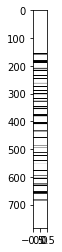

In [19]:
plt.imshow(mnist.train.images[55].reshape(784,1), cmap='binary', aspect=0.02)

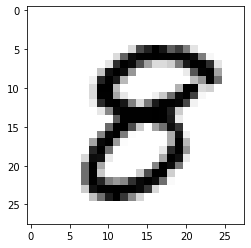

In [17]:
plt.imshow(mnist.train.images[55].reshape(28,28), cmap='binary')

In [50]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(tf.float32, shape=[None, 784])

In [51]:
W = tf.compat.v1.Variable(tf.zeros([784, 10]))

In [52]:
b = tf.compat.v1.Variable(tf.zeros([10]))

In [53]:
y = tf.matmul(x, W) + b

In [54]:
y_true = tf.compat.v1.placeholder(tf.float32, shape=[None, 10])

In [55]:
cross_entropy = tf.compat.v1.reduce_mean(
                    tf.compat.v1.nn.softmax_cross_entropy_with_logits_v2(
                        labels=y_true,
                        logits=y
                    )
                )

In [56]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(
                                learning_rate=0.5
                                )

In [57]:
train = optimizer.minimize(cross_entropy)

In [58]:
init = tf.compat.v1.global_variables_initializer()

In [59]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x: batch_x, y_true: batch_y})
        
    matches = tf.compat.v1.equal(
                    tf.compat.v1.arg_max(y, 1),
                    tf.compat.v1.arg_max(y_true, 1)
                )z
    accuracy = tf.compat.v1.reduce_mean(
                    tf.compat.v1.cast(matches, tf.float32)
                )
    print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                        y_true: mnist.test.labels
                                       }))

0.9166
